In [43]:
import torch
from torch import nn
from d2l import torch as d2l
 
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

初始化参数模型

In [44]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)

b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))

W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)

b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

激活函数

In [45]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

模型

In [46]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) 
    return (H@W2 + b2)

损失函数

In [47]:
loss = nn.CrossEntropyLoss(reduction='none')

训练

In [48]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)
d2l.predict_ch3(net, test_iter)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

多层感知机的简洁实现

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [49]:
net = nn.Sequential(nn.Flatten(),nn.Linear(784, 256),nn.ReLU(),nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [50]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

In [51]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

模型选择、欠拟合、过拟合

多项式回归

In [ ]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
max_degree = 20 # 多项式的最大阶数
n_train, n_test = 100, 100 # 训练和测试数据集大小
true_w = np.zeros(max_degree) # 分配大量的空间
true_w[0:4] = np.array([5, 1.2,-3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1,-1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) 
    
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [ ]:
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [52]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[0.1441],
         [1.0857]]),
 tensor([[1.0000e+00, 1.4412e-01, 1.0386e-02, 4.9893e-04, 1.7977e-05, 5.1817e-07,
          1.2447e-08, 2.5626e-10, 4.6166e-12, 7.3928e-14, 1.0655e-15, 1.3960e-17,
          1.6766e-19, 1.8587e-21, 1.9135e-23, 1.8385e-25, 1.6560e-27, 1.4039e-29,
          1.1241e-31, 8.5268e-34],
         [1.0000e+00, 1.0857e+00, 5.8941e-01, 2.1332e-01, 5.7902e-02, 1.2573e-02,
          2.2752e-03, 3.5290e-04, 4.7894e-05, 5.7779e-06, 6.2733e-07, 6.1919e-08,
          5.6023e-09, 4.6790e-10, 3.6287e-11, 2.6265e-12, 1.7823e-13, 1.1383e-14,
          6.8662e-16, 3.9237e-17]]),
 tensor([5.1776, 5.6896]))

对模型进行训练和测试

In [53]:
def evaluate_loss(net, data_iter, loss): 
    metric = d2l.Accumulator(2) # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [54]:
def train(train_features, test_features,train_labels, test_labels,num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',xlim=[1, num_epochs], ylim=[1e-3, 1e2],legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

AttributeError: module 'd2l.torch' has no attribute 'train_epoch_ch3'

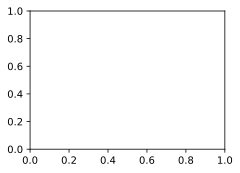

In [55]:
 train(poly_features[:n_train, :4], poly_features[n_train:, :4],labels[:n_train], labels[n_train:])

In [ ]:
 train(poly_features[:n_train, :2], poly_features[n_train:, :2],
 labels[:n_train], labels[n_train:])

In [ ]:
train(poly_features[:n_train, :], poly_features[n_train:, :],
 labels[:n_train], labels[n_train:], num_epochs=1500)

高维线性回归

In [ ]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [ ]:
def init_params():
     w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [ ]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [ ]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

In [ ]:
train(lambd=0)

In [ ]:
train(lambd=3)

In [56]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003

    trainer = torch.optim.SGD([ {"params":net[0].weight,'weight_decay': wd},{"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,(d2l.evaluate_loss(net, train_iter, loss),d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (7168x28 and 784x1)

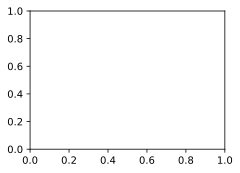

In [57]:
train_concise(0)

In [ ]:
train_concise(3)

暂退法

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
     # 在本情况中，所有元素都被丢弃
    if dropout == 1:
         return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0- dropout)

In [ ]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

In [ ]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [ ]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))

        if self.training == True:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

In [ ]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
net = nn.Sequential(nn.Flatten(),nn.Linear(784, 256),nn.ReLU(),nn.Dropout(dropout1), nn.Linear(256, 256), nn.ReLU(),nn.Dropout(dropout2),
 nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);